<a href="https://colab.research.google.com/github/delya9/customer_analysis/blob/main/Customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data

####**The main purpose** of this project is to predict the total expenses of new customers for a hotel using a regression model. The model was built using data from previous customers. RFM (Recency, Frequency, Monetary) analysis of the existing customer data was performed separately.

####The dataset used for this project is the "Hotel Customers Dataset" which contains personal, behavioral, demographic, and geographic information of hotel customers over a period of three years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 35)
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 6}

plt.rc('font', **font)


In [2]:
filepath = '/content/sample_data/HotelCustomersDataset.tsv'
df = pd.read_table(filepath)
df.shape

(83590, 31)

Data source: Antonio, Nuno; de Almeida, Ana; Nunes, Luis (2020), “Lisbon, Portugal, hotel’s customer dataset with three years of personal, behavioral, demographic, and geographic information”, Mendeley Data, V1, doi: 10.17632/j83f5fsh6c.1

#Data Cleaning

Checking if there are any NaN values in dataset

In [3]:
df.isnull().sum()

,0
ID,0
Nationality,0
Age,3779
DaysSinceCreation,0
NameHash,0
DocIDHash,0
AverageLeadTime,0
LodgingRevenue,0
OtherRevenue,0
BookingsCanceled,0


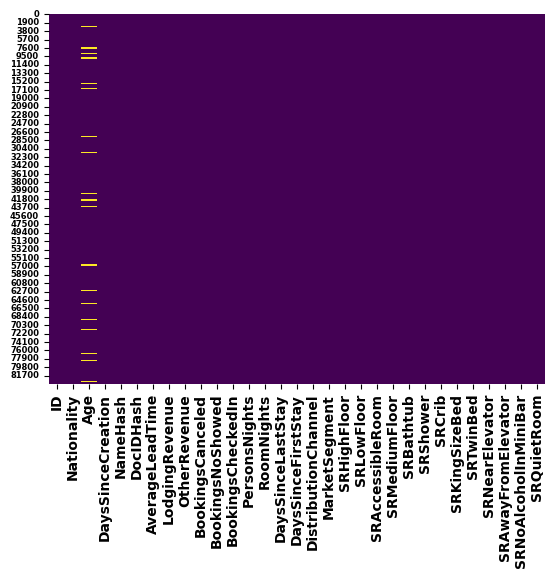

In [4]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xticks(fontsize=10)
plt.show()

There are not so many NaN data in 'Ages' column so we can drop these rows

In [5]:
df.dropna(axis = 0, inplace = True)
df.shape

(79811, 31)

In [6]:
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000
mean,42327.293944,45.398028,446.483267,66.809663,302.159477,67.956300,0.001842,0.000576,0.792948,4.698337,2.376276,394.310509,396.503577,0.048289,0.001453,0.000238,0.000877,0.002919,0.001779,0.013382,0.357357,0.143426,0.000351,0.003571,0.000125,0.090890
std,24012.564901,16.572368,310.620996,87.990086,368.022975,112.640373,0.065912,0.028312,0.690435,4.587289,2.196953,343.655426,344.398535,0.214378,0.038096,0.015428,0.029603,0.053953,0.042143,0.114903,0.479224,0.350509,0.018727,0.059651,0.011193,0.287454
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21680.500000,34.000000,174.000000,0.000000,64.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42383.000000,46.000000,385.000000,30.000000,236.000000,39.800000,0.000000,0.000000,1.000000,4.000000,2.000000,350.000000,357.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63194.500000,57.000000,703.000000,104.000000,407.000000,88.500000,0.000000,0.000000,1.000000,8.000000,4.000000,678.000000,682.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,116.000000,116.000000,1104.000000,1117.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that there are several negative values in columns 'Age'. This should be excluded since it is just not possible to be negative years old

In [7]:
df[df['Age']<0].shape[0] / df.shape[0] * 100

0.021300322010750397

Only 2% ! We can exclude them, because this modification will not ruin our data

In [8]:
df.drop(df[df['Age']<0].index, inplace = True)

#EDA

##Data visualization of customers and their expenses


In [9]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


Firstly I want to see the histogram of expenses as a whole and then we will see distribution of each expense type based on some features


In [10]:
df['TotalRevenue'] = df['LodgingRevenue'] + df['OtherRevenue']

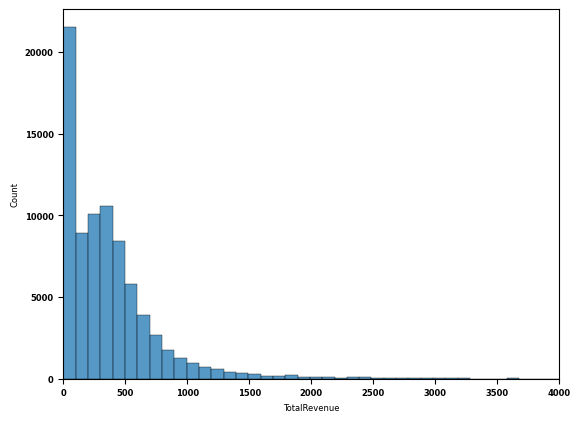

In [11]:
sns.histplot(df['TotalRevenue'], bins = 120)
plt.xlim(0,4000)
plt.show()

We can observe that our data is right skewed, so it makes more sense to look at medians rather than means. Also while building a model it will be better to log-transform target varibale.
So let's start with column 'Nationality'

###Customer expenses depending on their nationality

As Data Description says:
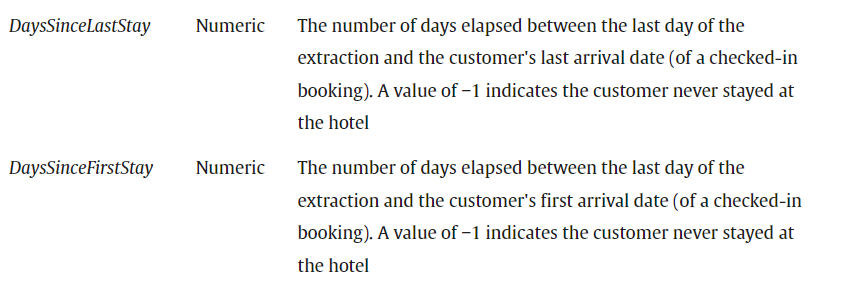

So in order to visualize who spends most or least we have to keep only those customers having non-negative values in columns described above

In [12]:
df_revenue = df[(df['DaysSinceLastStay'] >= 0) | (df['DaysSinceFirstStay'] >= 0)]
df_revenue.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,476.3
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,300.0
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,254.0
7,8,FRA,32.0,1095,0x5A3A2D6A659769FCA243FC2A97644D27A75FB9AA4DF3...,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.0,94.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,629.0
9,10,IRL,25.0,1095,0x801B08C30D1A38E502BFC39A7914A2FF786C353FE409...,0x0659443C9197CB0C2B728362C9837E67A72B3BA7D579...,96,174.0,69.0,0,0,1,6,3,1098,1098,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,243.0


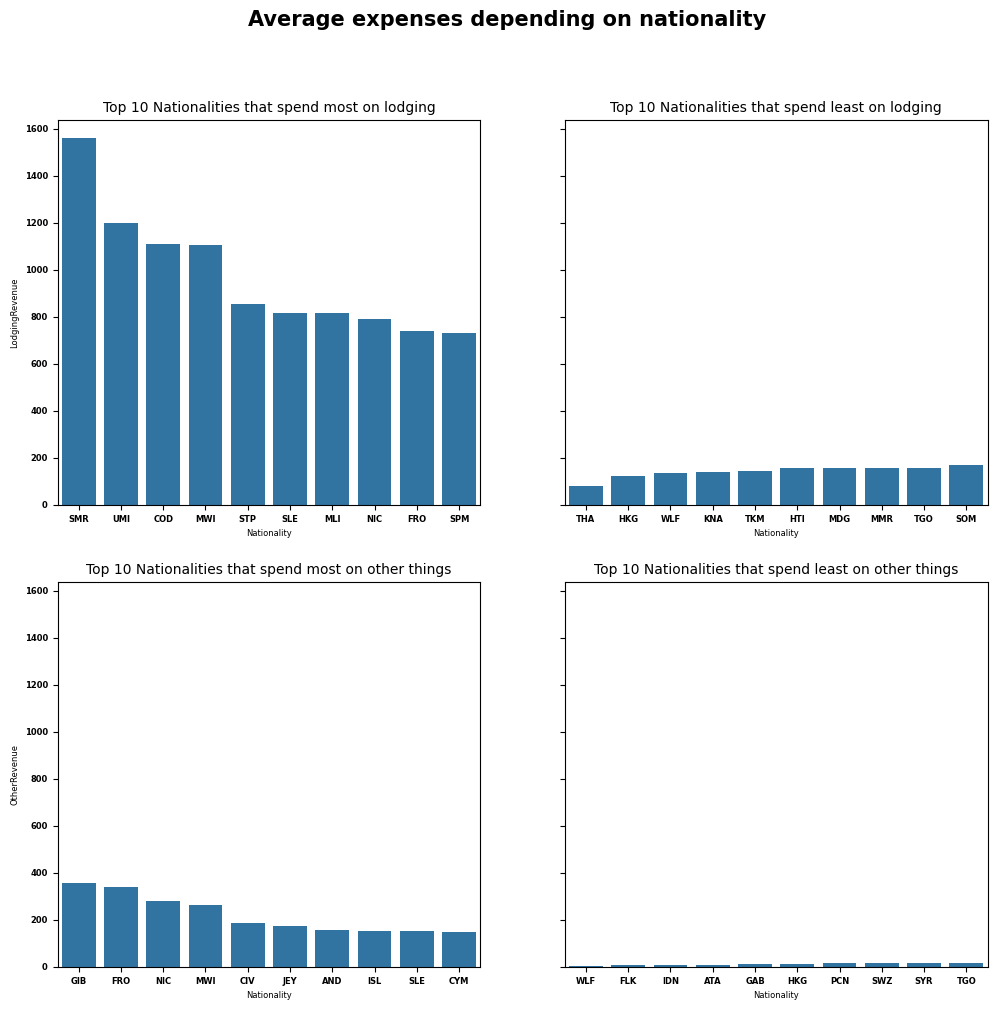

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 11), sharey=True)

fig.suptitle('Average expenses depending on nationality', fontsize = 15, fontweight = 'bold')
sns.barplot(df_revenue.groupby(['Nationality'])['LodgingRevenue'].median().nlargest(10), ax=axes[0, 0])
axes[0,0].set_title('Top 10 Nationalities that spend most on lodging', fontsize = 10)

sns.barplot(df_revenue.groupby(['Nationality'])['LodgingRevenue'].median().nsmallest(10), ax=axes[0, 1])
axes[0,1].set_title('Top 10 Nationalities that spend least on lodging', fontsize = 10)

sns.barplot(df_revenue.groupby(['Nationality'])['OtherRevenue'].median().nlargest(10), ax=axes[1, 0])
axes[1,0].set_title('Top 10 Nationalities that spend most on other things', fontsize = 10)

sns.barplot(df_revenue.groupby(['Nationality'])['OtherRevenue'].median().nsmallest(10), ax=axes[1, 1])
axes[1,1].set_title('Top 10 Nationalities that spend least on other things', fontsize = 10)

sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.show()

We can see some behavioural differences depending on people's nationality. Almost all the same nationalities tending to spend most on lodging spend most on other expenses as well

Now I want to see how customers usually make their bookings and how it looks like in current moment

###Customer distribution and their expenses by Distibution Channel and Market Segment


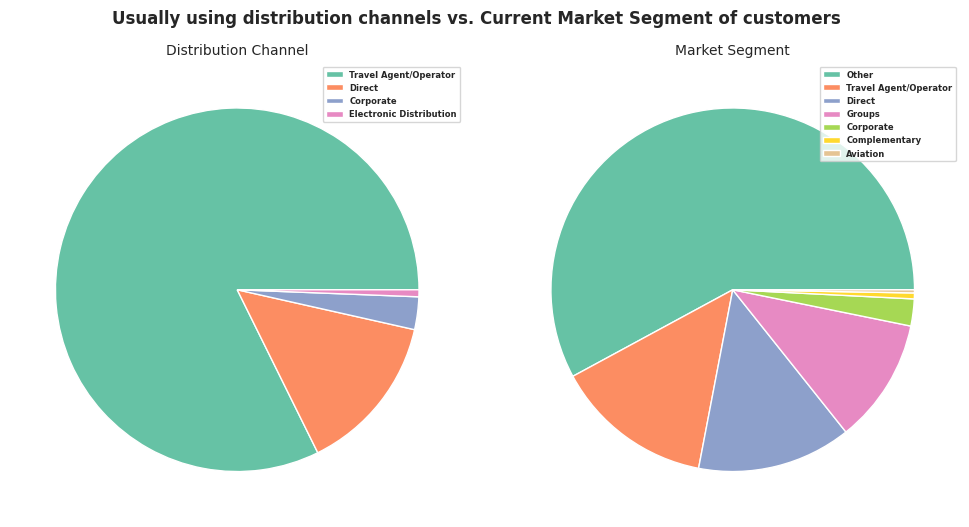

In [14]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
fig.suptitle('Usually using distribution channels vs. Current Market Segment of customers', fontsize = 12, fontweight = 'bold')

dist_channel_counts = df['DistributionChannel'].value_counts()
market_segment_counts = df['MarketSegment'].value_counts()

axes[0].pie(dist_channel_counts.values)
axes[0].set_title('Distribution Channel', fontsize = 10)
axes[0].legend(dist_channel_counts.index, loc="best")

axes[1].pie(market_segment_counts.values)
axes[1].set_title('Market Segment',  fontsize = 10)
axes[1].legend(market_segment_counts.index, loc="best")

plt.show()

There are some differences in distribution of customers, even if some distribution channels appear also in column 'Market Segment'

How many customers are loyal to the method of booking a hotel room we have in our dataset?

In [15]:
loyal_customers_percentage = df[df['DistributionChannel'] == df['MarketSegment']].shape[0]/df.shape[0]*100
print(f'{round(loyal_customers_percentage, 2)}%')

29.24%


I wonder if the method of booking is influencing the amount of money spent in the hotel

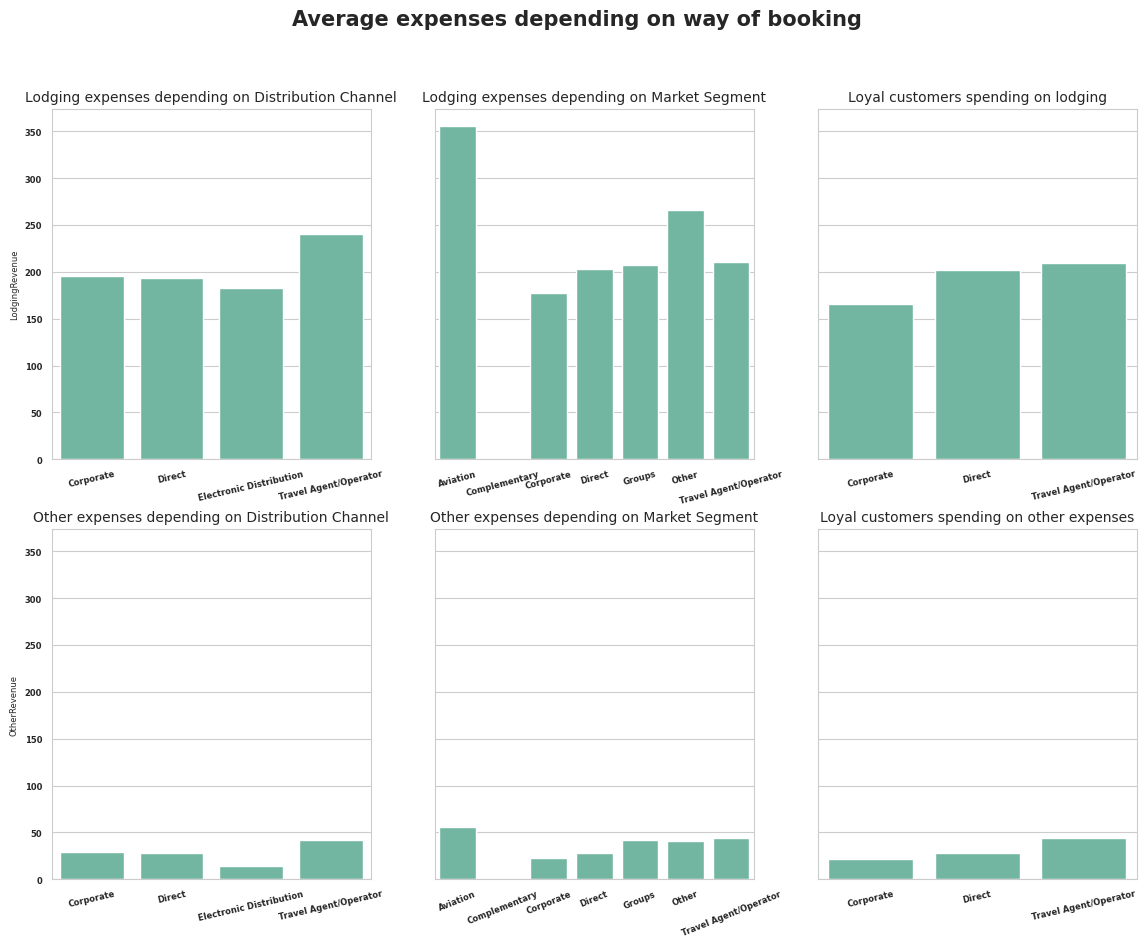

In [16]:
loyal_customers = df[df['DistributionChannel'] == df['MarketSegment']]
fig, axes = plt.subplots(2, 3, figsize=(14, 10), sharey=True)

fig.suptitle('Average expenses depending on way of booking', fontsize = 15, fontweight = 'bold')

sns.barplot(df.groupby(['DistributionChannel'])['LodgingRevenue'].median(), ax=axes[0, 0])
axes[0, 0].set_title('Lodging expenses depending on Distribution Channel', fontsize = 10)
axes[0, 0].tick_params(axis='x', rotation=13)
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(df.groupby(['MarketSegment'])['LodgingRevenue'].median(), ax=axes[0, 1])
axes[0, 1].set_title('Lodging expenses depending on Market Segment', fontsize = 10)
axes[0, 1].tick_params(axis='x', rotation=15)
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(loyal_customers.groupby(['MarketSegment'])['LodgingRevenue'].median(), ax=axes[0, 2])
axes[0, 2].set_title('Loyal customers spending on lodging', fontsize = 10)
axes[0, 2].tick_params(axis='x', rotation=13)
axes[0, 2].set_xlabel('')
axes[0, 2].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(df.groupby(['DistributionChannel'])['OtherRevenue'].median(), ax=axes[1, 0])
axes[1, 0].set_title('Other expenses depending on Distribution Channel', fontsize = 10)
axes[1, 0].tick_params(axis='x', rotation=13)
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(df.groupby(['MarketSegment'])['OtherRevenue'].median(), ax=axes[1, 1])
axes[1, 1].set_title('Other expenses depending on Market Segment', fontsize = 10)
axes[1, 1].tick_params(axis='x', rotation=22)
axes[1, 1].set_xlabel('')
axes[1, 1].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(loyal_customers.groupby(['MarketSegment'])['OtherRevenue'].median(), ax=axes[1, 2])
axes[1, 2].set_title('Loyal customers spending on other expenses', fontsize = 10)
axes[1, 2].tick_params(axis='x', rotation=13)
axes[1, 2].set_xlabel('')
axes[1, 2].tick_params(axis='both', which='major', labelsize=6)

sns.set_style('whitegrid')
sns.set_palette('deep')
plt.show()

We can see from the barplot that expenses weakly depend on type of booking. On average these expenses are pretty the same, but I think it still will be important to keep these variables, because they can hold some information. Also we will use Random Forest Regressor, which successfully gives determines "importance" of features and handles with high-dimensionality.

In [17]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,476.3
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,300.0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,254.0


###Customer expenses by Room Preferences

In [18]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'TotalRevenue'],
      dtype='object')

In [19]:
preferences = df[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom','SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator','SRNoAlcoholInMiniBar', 'SRQuietRoom', 'OtherRevenue', 'LodgingRevenue']]

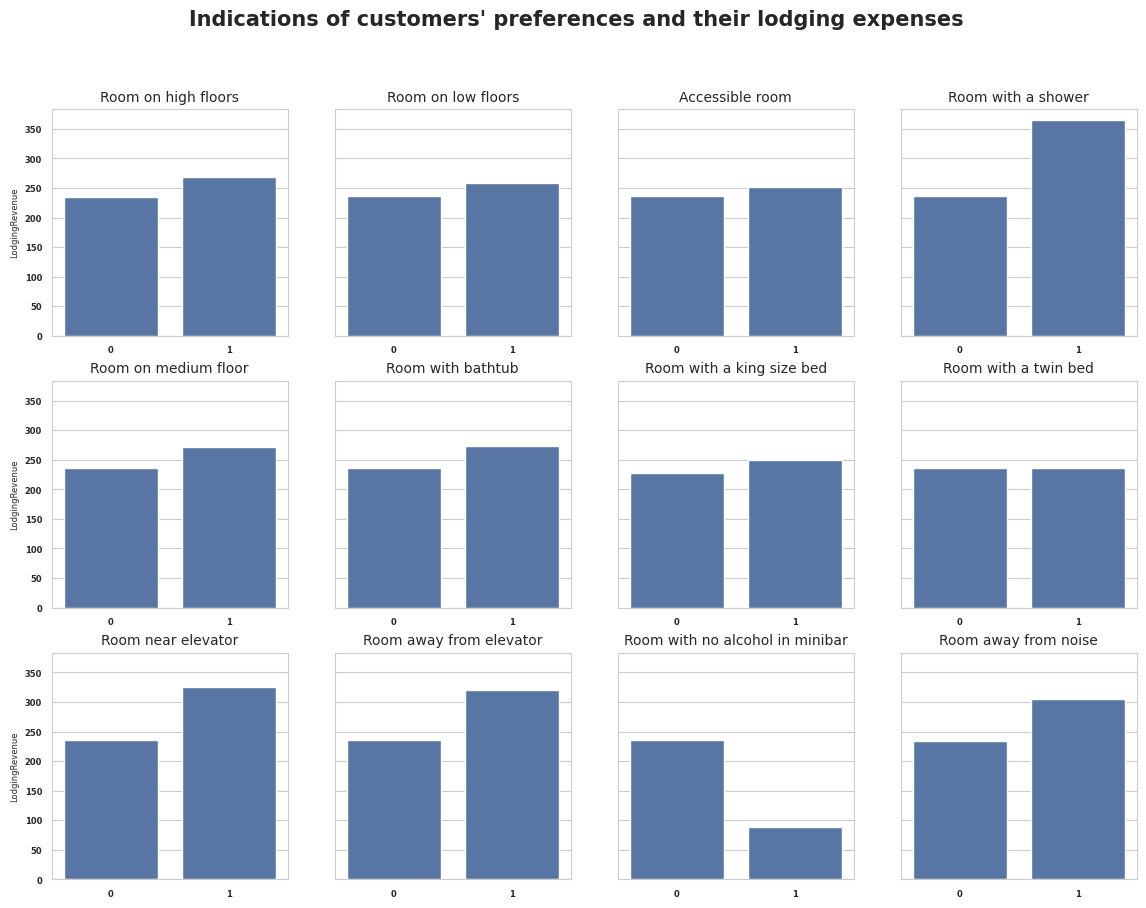

In [20]:
fig, axes = plt.subplots(3, 4, figsize=(14, 10), sharey=True)

fig.suptitle("Indications of customers' preferences and their lodging expenses", fontsize = 15, fontweight = 'bold')

sns.barplot(preferences.groupby(['SRHighFloor'])['LodgingRevenue'].median(), ax=axes[0, 0])
axes[0, 0].set_title('Room on high floors', fontsize = 10)
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRLowFloor'])['LodgingRevenue'].median(), ax=axes[0, 1])
axes[0, 1].set_title('Room on low floors', fontsize = 10)
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRAccessibleRoom'])['LodgingRevenue'].median(), ax=axes[0, 2])
axes[0, 2].set_title('Accessible room', fontsize = 10)
axes[0, 2].set_xlabel('')
axes[0, 2].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRShower'])['LodgingRevenue'].median(), ax=axes[0, 3])
axes[0, 3].set_title('Room with a shower', fontsize = 10)
axes[0, 3].set_xlabel('')
axes[0, 3].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRMediumFloor'])['LodgingRevenue'].median(), ax=axes[1, 0])
axes[1, 0].set_title('Room on medium floor', fontsize = 10)
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRBathtub'])['LodgingRevenue'].median(), ax=axes[1, 1])
axes[1, 1].set_title('Room with bathtub', fontsize = 10)
axes[1, 1].set_xlabel('')
axes[1, 1].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRKingSizeBed'])['LodgingRevenue'].median(), ax=axes[1, 2])
axes[1, 2].set_title('Room with a king size bed', fontsize = 10)
axes[1, 2].set_xlabel('')
axes[1, 2].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRTwinBed'])['LodgingRevenue'].median(), ax=axes[1, 3])
axes[1, 3].set_title('Room with a twin bed', fontsize = 10)
axes[1, 3].set_xlabel('')
axes[1, 3].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRNearElevator'])['LodgingRevenue'].median(), ax=axes[2, 0])
axes[2, 0].set_title('Room near elevator', fontsize = 10)
axes[2, 0].set_xlabel('')
axes[2, 0].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRAwayFromElevator'])['LodgingRevenue'].median(), ax=axes[2, 1])
axes[2, 1].set_title('Room away from elevator', fontsize = 10)
axes[2, 1].set_xlabel('')
axes[2, 1].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRNoAlcoholInMiniBar'])['LodgingRevenue'].median(), ax=axes[2, 2])
axes[2, 2].set_title('Room with no alcohol in minibar', fontsize = 10)
axes[2, 2].set_xlabel('')
axes[2, 2].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRQuietRoom'])['LodgingRevenue'].median(), ax=axes[2, 3])
axes[2, 3].set_title('Room away from noise', fontsize = 10)
axes[2, 3].set_xlabel('')
axes[2, 3].tick_params(axis='both', which='major', labelsize=6)


sns.set_style('whitegrid')
sns.set_palette('deep')
plt.show()

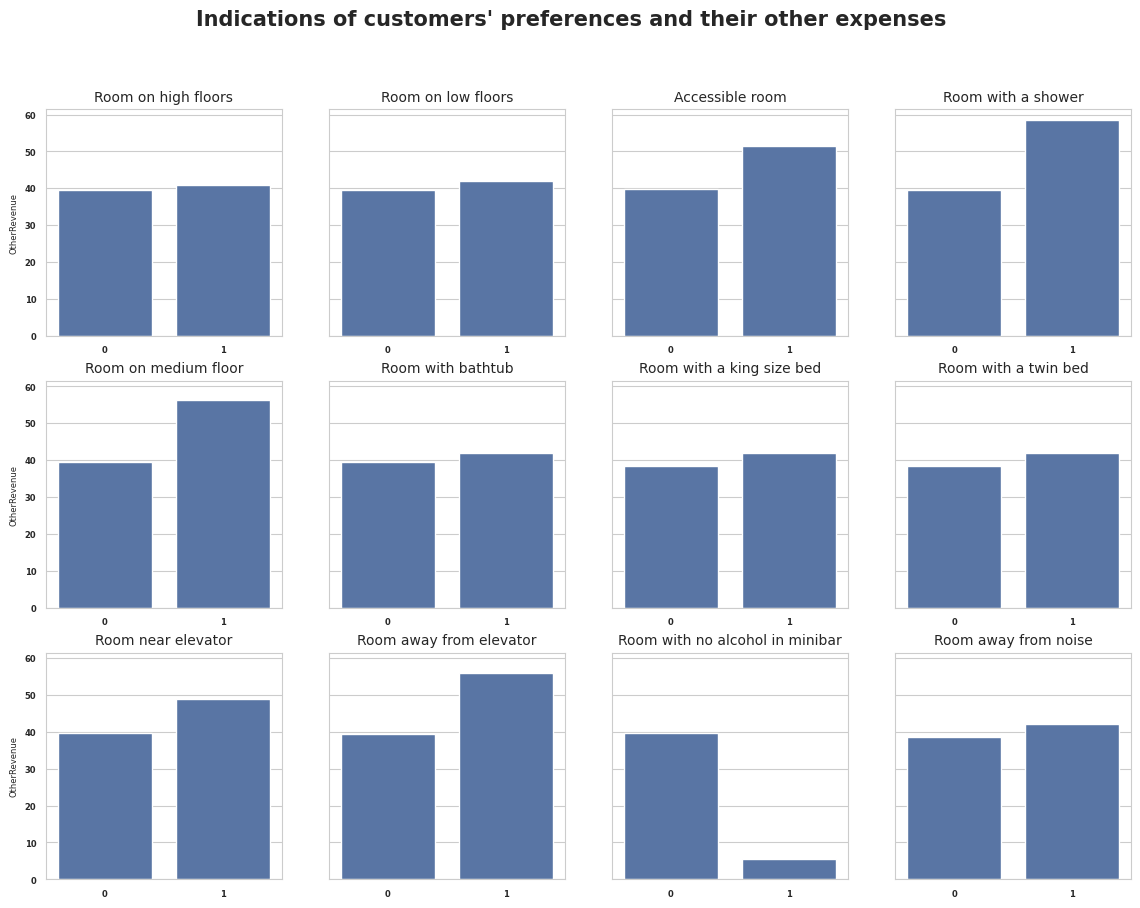

In [21]:
fig, axes = plt.subplots(3, 4, figsize=(14, 10), sharey=True)

fig.suptitle("Indications of customers' preferences and their other expenses", fontsize = 15, fontweight = 'bold')

sns.barplot(preferences.groupby(['SRHighFloor'])['OtherRevenue'].median(), ax=axes[0, 0])
axes[0, 0].set_title('Room on high floors', fontsize = 10)
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRLowFloor'])['OtherRevenue'].median(), ax=axes[0, 1])
axes[0, 1].set_title('Room on low floors', fontsize = 10)
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRAccessibleRoom'])['OtherRevenue'].median(), ax=axes[0, 2])
axes[0, 2].set_title('Accessible room', fontsize = 10)
axes[0, 2].set_xlabel('')
axes[0, 2].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRShower'])['OtherRevenue'].median(), ax=axes[0, 3])
axes[0, 3].set_title('Room with a shower', fontsize = 10)
axes[0, 3].set_xlabel('')
axes[0, 3].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRMediumFloor'])['OtherRevenue'].median(), ax=axes[1, 0])
axes[1, 0].set_title('Room on medium floor', fontsize = 10)
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRBathtub'])['OtherRevenue'].median(), ax=axes[1, 1])
axes[1, 1].set_title('Room with bathtub', fontsize = 10)
axes[1, 1].set_xlabel('')
axes[1, 1].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRKingSizeBed'])['OtherRevenue'].median(), ax=axes[1, 2])
axes[1, 2].set_title('Room with a king size bed', fontsize = 10)
axes[1, 2].set_xlabel('')
axes[1, 2].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRTwinBed'])['OtherRevenue'].median(), ax=axes[1, 3])
axes[1, 3].set_title('Room with a twin bed', fontsize = 10)
axes[1, 3].set_xlabel('')
axes[1, 3].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRNearElevator'])['OtherRevenue'].median(), ax=axes[2, 0])
axes[2, 0].set_title('Room near elevator', fontsize = 10)
axes[2, 0].set_xlabel('')
axes[2, 0].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRAwayFromElevator'])['OtherRevenue'].median(), ax=axes[2, 1])
axes[2, 1].set_title('Room away from elevator', fontsize = 10)
axes[2, 1].set_xlabel('')
axes[2, 1].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRNoAlcoholInMiniBar'])['OtherRevenue'].median(), ax=axes[2, 2])
axes[2, 2].set_title('Room with no alcohol in minibar', fontsize = 10)
axes[2, 2].set_xlabel('')
axes[2, 2].tick_params(axis='both', which='major', labelsize=6)

sns.barplot(preferences.groupby(['SRQuietRoom'])['OtherRevenue'].median(), ax=axes[2, 3])
axes[2, 3].set_title('Room away from noise', fontsize = 10)
axes[2, 3].set_xlabel('')
axes[2, 3].tick_params(axis='both', which='major', labelsize=6)


sns.set_style('whitegrid')
sns.set_palette('deep')
plt.show()

We see that some features affect a lot, but some not really. In further predictive analysis I suggest to keep all features. RandomForestRegressor model we will use is able to give feature importance scores for them later.



##RFM Analysis
RFM (Recency, Frequency, Monetary) analysis is a powerful method for customer segmentation that helps businesses understand their customers' behaviors and preferences. In this analysis, we'll be evaluating customer value based on three key metrics:

Recency: This metric measures the number of days since the customer's last stay. The recency score reflects how recently a customer has engaged with the business. A lower number of days indicates a more recent interaction, which generally suggests higher engagement.

Frequency: This score represents the total number of bookings a customer has checked in. It quantifies how often a customer makes a booking. Higher frequency indicates that the customer is more engaged and loyal to the business.

Monetary: This metric tracks the total revenue generated from each customer. It measures how much money a customer has spent over their entire relationship with the business. A higher monetary value signifies a more valuable customer.

We have fewer unique values in column "Bookings Checked In", so it would be preferable to cut those values manually

In [22]:
df['BookingsCheckedIn'].value_counts().sort_index(ascending=False)

,count
BookingsCheckedIn,
66,1
57,1
40,1
34,1
29,2
26,1
25,1
24,1
23,2


In [23]:
rfm_df = df[df['DaysSinceLastStay']>0]
rfm_df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,476.3
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,300.0
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,254.0
7,8,FRA,32.0,1095,0x5A3A2D6A659769FCA243FC2A97644D27A75FB9AA4DF3...,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.0,94.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,629.0
9,10,IRL,25.0,1095,0x801B08C30D1A38E502BFC39A7914A2FF786C353FE409...,0x0659443C9197CB0C2B728362C9837E67A72B3BA7D579...,96,174.0,69.0,0,0,1,6,3,1098,1098,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,243.0


Now we will cut each metric and assign labels. It's important to understand that lower values in recency indicate higher score in Recency since values are derived from column 'Days Since Last Stay'

In [24]:
rfm_df['RecencyScore'] = pd.qcut(rfm_df['DaysSinceLastStay'].rank(method = 'first'), 5, labels=[5, 4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.cut(rfm_df['BookingsCheckedIn'], bins=[0, 1, 2, 10, 50, rfm_df['BookingsCheckedIn'].max()], labels=[1, 2, 3, 4, 5])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['TotalRevenue'].rank(method = 'first'), 5, labels=[1, 2, 3, 4, 5])

rfm_df['RFM'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)
rfm_df

<ipython-input-24-0c99b2121f38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['RecencyScore'] = pd.qcut(rfm_df['DaysSinceLastStay'].rank(method = 'first'), 5, labels=[5, 4, 3, 2, 1])
<ipython-input-24-0c99b2121f38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['FrequencyScore'] = pd.cut(rfm_df['BookingsCheckedIn'], bins=[0, 1, 2, 10, 50, rfm_df['BookingsCheckedIn'].max()], labels=[1, 2, 3, 4, 5])
<ipython-input-24-0c99b2121f38>:3: SettingWithCopyWarning: 
A value is trying to be set on a

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,RecencyScore,FrequencyScore,MonetaryScore,RFM
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,476.3,5,3,4,534
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,300.0,1,1,2,112
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,254.0,1,1,2,112
7,8,FRA,32.0,1095,0x5A3A2D6A659769FCA243FC2A97644D27A75FB9AA4DF3...,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.0,94.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,629.0,1,1,4,114
9,10,IRL,25.0,1095,0x801B08C30D1A38E502BFC39A7914A2FF786C353FE409...,0x0659443C9197CB0C2B728362C9837E67A72B3BA7D579...,96,174.0,69.0,0,0,1,6,3,1098,1098,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,243.0,1,1,2,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83580,83581,DEU,48.0,0,0x98FF1A89EAFB3D2A757C073C0FB89647DD33EDB97B8D...,0x9A75BA8B885B4CCF562FEC991F4B34DDECE67D43DD04...,20,176.0,147.0,0,0,1,4,2,2,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,323.0,5,1,2,512
83582,83583,FRA,49.0,0,0x92C604CF82CF16CB1BD33732B537F86D007B7BC48C8C...,0x5672F95F21E93CDF0387BC40900503CA91352EA17B84...,91,143.0,2.0,0,0,1,2,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,145.0,5,1,1,511
83584,83585,ITA,52.0,0,0xC93C23F50B11F71BD77EC36202B9D42AB0BAA8E77F9F...,0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...,116,336.9,105.5,0,0,1,8,4,4,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,442.4,5,1,3,513
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,0,1,6,3,3,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,604.6,5,1,4,514


In order to assign customer segment I will use this table and add some new segments as well

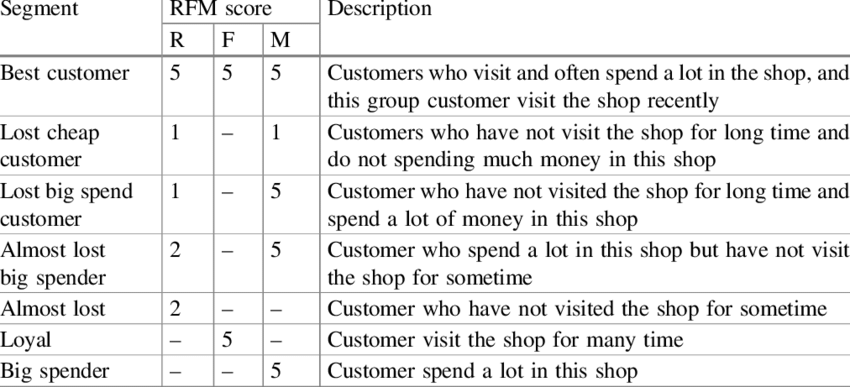

In [25]:
def assign_segment(row):
    recency = int(row['RecencyScore'])
    frequency = int(row['FrequencyScore'])
    monetary = int(row['MonetaryScore'])

    if recency >= 4 and frequency == 5 and monetary == 5:
        return 'Champions'
    elif frequency >= 4:
        return 'Loyal Customers'
    elif recency < 3 and frequency <= 2 and monetary >= 4:
        return 'Lost Big Spend Customers'
    elif recency > 3 and frequency <= 2 and monetary >= 4:
        return 'New Big Spend Customers'
    elif recency < 3 and  frequency <= 2 and monetary <= 3:
        return 'Lost Cheap Customers'
    elif recency > 3 and frequency <= 2 and monetary <= 3:
        return 'New Cheap Customers'
    elif recency == 2 and monetary >= 4:
        return 'Almost lost big spenders'
    elif recency == 2 and monetary <= 3:
        return 'Almost lost'
    elif  monetary == 5:
        return 'Big Spenders'
    else:
        return 'Other customers'



rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)
rfm_df.head(50)

<ipython-input-25-0b833972097a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)


,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,RecencyScore,FrequencyScore,MonetaryScore,RFM,Segment
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.00,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,476.30,5,3,4,534,Other customers
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.00,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,300.00,1,1,2,112,Lost Cheap Customers
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.00,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,254.00,1,1,2,112,Lost Cheap Customers
7,8,FRA,32.0,1095,0x5A3A2D6A659769FCA243FC2A97644D27A75FB9AA4DF3...,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.00,94.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,629.00,1,1,4,114,Lost Big Spend Customers
9,10,IRL,25.0,1095,0x801B08C30D1A38E502BFC39A7914A2FF786C353FE409...,0x0659443C9197CB0C2B728362C9837E67A72B3BA7D579...,96,174.00,69.0,0,0,1,6,3,1098,1098,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,243.00,1,1,2,112,Lost Cheap Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,ESP,68.0,1094,0xDF7152ABD252C79D8CEFA0DD79CBA6D84807CD109DB1...,0xF66E8275A2E4CDF5BD207D08A19B2FDC17DA9465C0C6...,49,406.05,381.5,0,0,1,10,5,1099,1099,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,787.55,1,1,5,115,Lost Big Spend Customers
93,94,ESP,60.0,1094,0xCB5522E014B9378408BA0D2BEF6AC83ED9DE96F81049...,0x9AA39F965FF67B628B73FFA8DA17A9C897B112FD982A...,58,485.00,101.0,0,0,1,10,5,1099,1099,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0,586.00,1,1,4,114,Lost Big Spend Customers
95,96,ESP,71.0,1094,0xB43895EEFC516F4E5AEA1221C7772F80C80BB3454CC8...,0xB051C7EB8ABFABA2BEAEDD873F56EED04F7B1B2E33E9...,49,406.05,361.5,0,0,1,10,5,1099,1099,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,767.55,1,1,5,115,Lost Big Spend Customers
97,98,ESP,62.0,1094,0x939A9950FB353A6286CBC5FA2C945C9A6A364D458679...,0x36EFD70013B55E2F904A5D6BA73D82F07B3673C66A3B...,58,485.00,134.5,0,0,1,10,5,1099,1099,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0,619.50,1,1,4,114,Lost Big Spend Customers


####**The Problem:**

Most customers aren't spending much money.

Many customers who used to spend a lot are no longer buying.

There are very few loyal customers.

####**The Big Picture:**

The business has a lot of customers who aren't very valuable. A small group of customers brings in most of the money, but they're starting to leave. This means the business is losing money.

####**How to Improve the Situation**
To fix this, the business needs to:

Focus on the good customers: Pay more attention to the customers who spend a lot of money and try to keep them happy.

Bring back lost customers: Figure out why customers stopped buying and try to get them back.

Turn new customers into loyal ones: Make sure new customers have a great experience so they keep coming back.

Find out why customers are leaving: Understand why customers are choosing to buy from other places.


In [26]:
rfm_df['Segment'].value_counts()

,count
Segment,
Lost Cheap Customers,16245
New Cheap Customers,13500
New Big Spend Customers,10565
Other customers,9288
Lost Big Spend Customers,8023
Big Spenders,3055
Loyal Customers,30
Almost lost big spenders,14
Almost lost,3


#Predictive Analysis of Customer Life Value (Total Revenue)

Our main goal is to build a model that predict total expenses of new customer. As we've already seen expenses depend mainly on Nationality of customer, room preferences, booking behaviour, distribution channels and market segments. So we will add all of them as features of target variable.

We should remember about our categorical columns "Nationality", "Distribution Channel", "Market Segment. But there are some issues related to this. Since we are dealing with categorical variables with high-cardinality it will be reasonable to use target-encoding on these columns.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

<Axes: xlabel='TotalRevenue'>

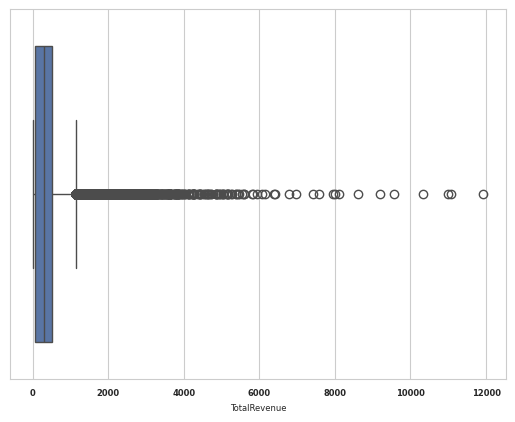

In [28]:
sns.boxplot(x=df['TotalRevenue'])

As we see we have a lot of outliers. They should be excluded, because they will do our model weaker. I will exclude them usng IQR.

In [29]:
Q1 = df['TotalRevenue'].quantile(0.25)
Q3 = df['TotalRevenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['TotalRevenue'] >= lower_bound) & (df['TotalRevenue'] <= upper_bound)]

In [ ]:
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,476.3
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,300.0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,0,1,6,3,3,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,604.6
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,0,1,6,3,3,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0,990.3


In [32]:
from sklearn.preprocessing import TargetEncoder
cat_variables = ['Nationality', 'DistributionChannel', 'MarketSegment']
target_encoder = TargetEncoder(smooth = 20, target_type = 'continuous', random_state = 7)

In [33]:
X = df.drop(columns=['ID', 'NameHash', 'DocIDHash', 'LodgingRevenue', 'OtherRevenue', 'TotalRevenue'])
y = df['TotalRevenue']
X

,Nationality,Age,DaysSinceCreation,AverageLeadTime,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,JPN,54.0,1095,58,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0,0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
83586,IRL,47.0,0,109,0,0,1,6,3,3,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
83587,IRL,53.0,0,0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
83588,IRL,85.0,0,109,0,0,1,6,3,3,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
X_encoded = target_encoder.fit_transform(X[cat_variables], y)
X_encoded = pd.DataFrame(X_encoded, columns = cat_variables, index = X.index)
X = X.drop(columns=cat_variables)
X = X.join(X_encoded)
X

,Age,DaysSinceCreation,AverageLeadTime,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Nationality,DistributionChannel,MarketSegment
0,51.0,150,45,1,0,3,8,5,151,1074,0,0,0,0,0,0,0,0,0,0,0,0,0,243.188632,285.949512,273.351969
2,31.0,1095,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,318.228169,310.361171,282.749562
3,60.0,1095,93,0,0,1,10,5,1100,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,320.613067,310.681546,285.658245
4,51.0,1095,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,320.613067,310.681546,285.658245
5,54.0,1095,58,0,0,1,4,2,1097,1097,0,0,0,0,0,0,0,0,0,0,0,0,0,329.708798,310.034908,321.915751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54.0,0,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,315.801717,310.034908,321.915751
83586,47.0,0,109,0,0,1,6,3,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,320.295666,310.361171,322.543947
83587,53.0,0,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,306.331456,309.799391,321.178629
83588,85.0,0,109,0,0,1,6,3,3,3,0,0,0,0,0,0,0,0,1,0,0,0,0,320.295666,310.361171,322.543947


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
rf = RandomForestRegressor(random_state=42)

param_random = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [50, 100, 200, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_random, cv=2, n_jobs=-1, scoring='r2', verbose=2, n_iter = 10)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

best_rf = random_search.best_estimator_


Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 200}


In [40]:
y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


R^2 Score: 0.8215817351879531
Mean Squared Error: 12951.390091771134
Mean Absolute Error: 63.116533433667016
